In [ ]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Salaries.csv")

#2
print("Rows, Columns:", df.shape)

print("\nFirst 10 rows:")
print(df.head(10))

print("\nLast 15 rows:")
print(df.tail(15))

#3
gender_salary = df.groupby("sex")["salary"]

print("Highest salary by gender:")
print(gender_salary.max())

print("\nLowest salary by gender:")
print(gender_salary.min())








Rows, Columns: (78, 6)

First 10 rows:
        rank discipline   phd  service   sex    salary
0       Prof          B  56.0       49  Male  186960.0
1       Prof          A  12.0        6  Male   93000.0
2       Prof          A  23.0       20  Male  110515.0
3       Prof          A  40.0       31  Male  131205.0
4       Prof          B  20.0       18  Male  104800.0
5       Prof          A  20.0       20  Male  122400.0
6  AssocProf          A  20.0       17  Male   81285.0
7       Prof          A  18.0       18  Male       NaN
8       Prof          A  29.0       19  Male   94350.0
9       Prof          A  51.0       51  Male   57800.0

Last 15 rows:
         rank discipline   phd  service     sex    salary
63       Prof          A  29.0       27  Female   91000.0
64  AssocProf          A  26.0       24  Female   73300.0
65       Prof          A  36.0       19  Female  117555.0
66   AsstProf          A   7.0        6  Female   63100.0
67       Prof          A  17.0       11  Female   9

In [ ]:
#4
highest_salary = df.loc[df["salary"].idxmax()]
lowest_salary = df.loc[df["salary"].idxmin()]

print("Highest Salary Professor:")
print(highest_salary)

print("\nLowest Salary Professor:")
print(lowest_salary)


Highest Salary Professor:
rank              Prof
discipline           B
phd               56.0
service             49
sex               Male
salary        186960.0
Name: 0, dtype: object

Lowest Salary Professor:
rank             Prof
discipline          A
phd              51.0
service            51
sex              Male
salary        57800.0
Name: 9, dtype: object


In [7]:
#5

df["salary"] = df.groupby("service")["salary"].transform(
    lambda x: x.fillna(x.mean())
)
print(df)

         rank discipline   phd  service     sex    salary
0        Prof          B  56.0       49    Male  186960.0
1        Prof          A  12.0        6    Male   93000.0
2        Prof          A  23.0       20    Male  110515.0
3        Prof          A  40.0       31    Male  131205.0
4        Prof          B  20.0       18    Male  104800.0
..        ...        ...   ...      ...     ...       ...
73       Prof          B  18.0       10  Female  105450.0
74  AssocProf          B  19.0        6  Female  104542.0
75       Prof          B  17.0       17  Female  124312.0
76       Prof          A  28.0       14  Female  109954.0
77       Prof          A  23.0       15  Female  109646.0

[78 rows x 6 columns]


In [8]:
#6
df["phd"] = df.groupby("service")["phd"].transform(
    lambda x: x.fillna(x.mean())
)

print(df)

         rank discipline   phd  service     sex    salary
0        Prof          B  56.0       49    Male  186960.0
1        Prof          A  12.0        6    Male   93000.0
2        Prof          A  23.0       20    Male  110515.0
3        Prof          A  40.0       31    Male  131205.0
4        Prof          B  20.0       18    Male  104800.0
..        ...        ...   ...      ...     ...       ...
73       Prof          B  18.0       10  Female  105450.0
74  AssocProf          B  19.0        6  Female  104542.0
75       Prof          B  17.0       17  Female  124312.0
76       Prof          A  28.0       14  Female  109954.0
77       Prof          A  23.0       15  Female  109646.0

[78 rows x 6 columns]


sex
Male      39
Female    39
Name: count, dtype: int64


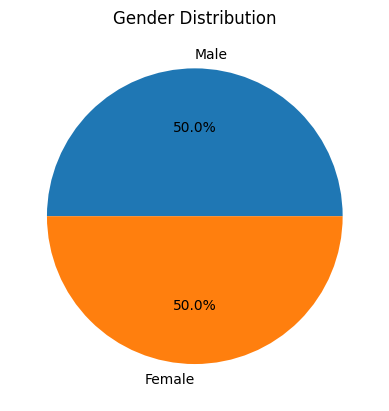

In [10]:
#7
gender_count = df["sex"].value_counts()
print(gender_count)
plt.figure()
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()



rank
Prof         46
AsstProf     19
AssocProf    13
Name: count, dtype: int64


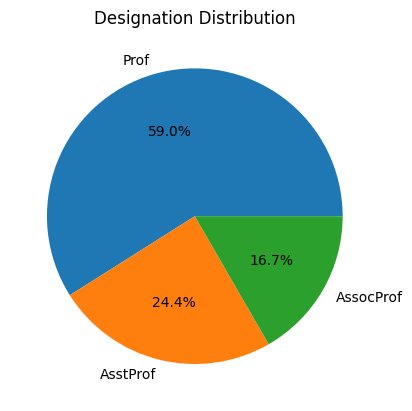

In [11]:
#8

rank_count = df["rank"].value_counts()
print(rank_count)
plt.figure()
plt.pie(rank_count, labels=rank_count.index, autopct="%1.1f%%")
plt.title("Designation Distribution")
plt.show()


In [12]:
#9
senior = df.loc[df["service"].idxmax()]
junior = df.loc[df["service"].idxmin()]

print("Senior-most employee:")
print(senior)

print("\nJunior-most employee:")
print(junior)


Senior-most employee:
rank             Prof
discipline          A
phd              51.0
service            51
sex              Male
salary        57800.0
Name: 9, dtype: object

Junior-most employee:
rank          AsstProf
discipline           B
phd                1.0
service              0
sex               Male
salary         88000.0
Name: 12, dtype: object


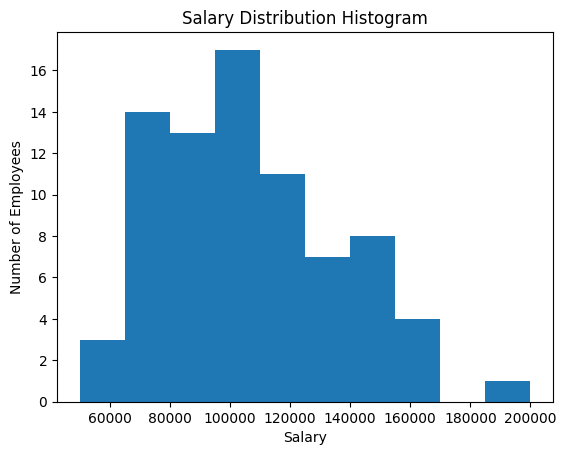

In [13]:
#10
bins = np.arange(50000, df["salary"].max() + 15000, 15000)

plt.figure()
plt.hist(df["salary"], bins=bins)
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Salary Distribution Histogram")
plt.show()
